# **Importing** **Data**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving weatherAUS.csv to weatherAUS.csv


In [3]:
import pandas as pd

# Replace 'your_file.csv' with the actual name of your uploaded CSV file
full_data = pd.read_csv('weatherAUS.csv')
full_data.head()  # View the first few rows of the dataset

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# Data Exploration

In [4]:
full_data.shape

(145460, 23)

In [5]:
full_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Replace 'No' with 0 and 'Yes' with 1
full_data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)


<ipython-input-6-fed79314f1a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
<ipython-input-6-fed79314f1a3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
<ipython

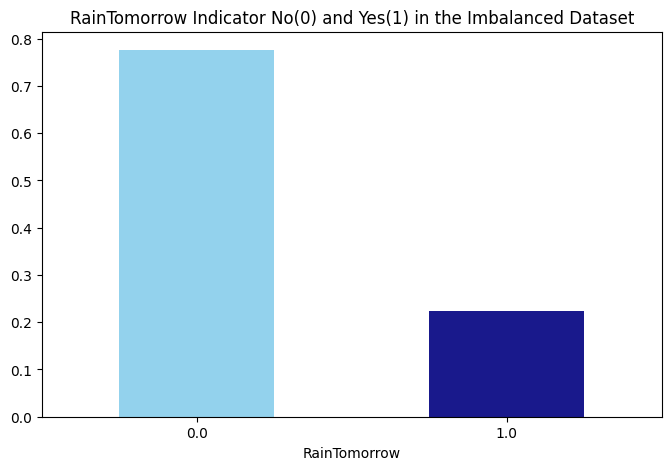

In [7]:
import matplotlib.pyplot as plt

# Set figure size
fig = plt.figure(figsize=(8, 5))

# Plot the normalized value counts for 'RainTomorrow'
full_data.RainTomorrow.value_counts(normalize=True).plot(
    kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0
)

# Add title to the plot
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')

# Show the plot
plt.show()

# Handling Class Imbalance

In [10]:
from sklearn.utils import resample
import pandas as pd

# Splitting the dataset into two: one where RainTomorrow is 0 and one where it is 1
no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]

# Oversampling the 'yes' class to match the number of 'no' class
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)

# Combining both the 'no' class and the oversampled 'yes' class
oversampled = pd.concat([no, yes_oversampled])


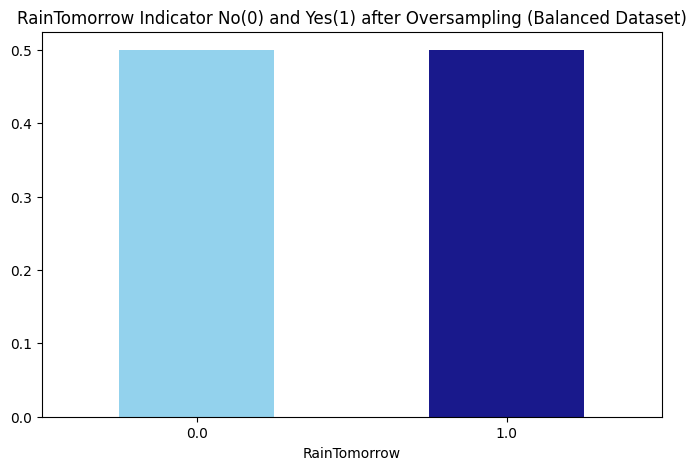

In [11]:
import matplotlib.pyplot as plt

# Set the figure size
fig = plt.figure(figsize=(8, 5))

# Plot normalized value counts of 'RainTomorrow' after oversampling
oversampled.RainTomorrow.value_counts(normalize=True).plot(
    kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0
)

# Add plot title
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')

# Show the plot
plt.show()


<Axes: >

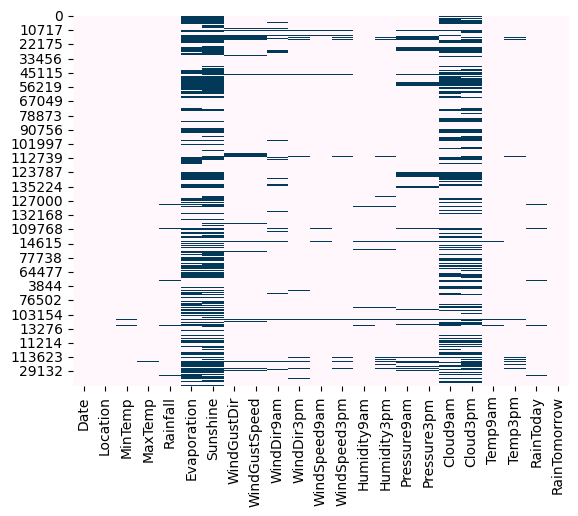

In [12]:
import seaborn as sns

# Plot the missing data pattern
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')


In [13]:
# Calculate the total and percentage of missing values for each column
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum() / oversampled.isnull().count()).sort_values(ascending=False)

# Combine the two into a single DataFrame
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Display the first 4 rows of missing data summary
missing.head(4)


Total   Percent
Sunshine     104831  0.475140
Evaporation   95411  0.432444
Cloud3pm      85614  0.388040
Cloud9am      81339  0.368664

# Imputation and Transformation

In [14]:
oversampled.select_dtypes(include=['object']).columns


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [15]:
# Impute missing values in categorical columns using the mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])


In [16]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all object columns
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])


In [17]:
import warnings
warnings.filterwarnings("ignore")


In [18]:
from sklearn.experimental import enable_iterative_imputer  # Enable MICE
from sklearn.impute import IterativeImputer

# Make a deep copy of the oversampled data
MiceImputed = oversampled.copy(deep=True)

# Perform MICE imputation
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

# Display the first few rows after imputation
MiceImputed.head()


Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0   396         2     13.4     22.9       0.6     5.734653   7.446035   
1   397         2      7.4     25.1       0.0     5.639329  11.520531   
2   398         2     12.9     25.7       0.0     7.762688  12.348852   
3   399         2      9.2     28.0       0.0     5.977293  11.811634   
4   400         2     17.5     32.3       1.0     6.852837   5.728406   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13           44.0          13  ...         71.0         22.0   
1           14           44.0           6  ...         44.0         25.0   
2           15           46.0          13  ...         38.0         30.0   
3            4           24.0           9  ...         45.0         16.0   
4           13           41.0           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.848545     16.9     21.8        0.0   
1       1010.6       1007.8  1.731945  2.625892     17.2     24.3        0.0   
2       1007.6       1008.7  1.827673  2.000000     21.0     23.2        0.0   
3       1017.6       1012.8  1.233996  2.116194     18.1     26.5        0.0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7        0.0   

   RainTomorrow  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 23 columns]

In [19]:
MiceImputed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
# Calculate the IQR for detecting outliers
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.120044
Sunshine            5.979485
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.684676
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [21]:
# Remove outliers based on IQR
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) | (MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the new shape of the dataset
MiceImputed.shape


(170669, 23)

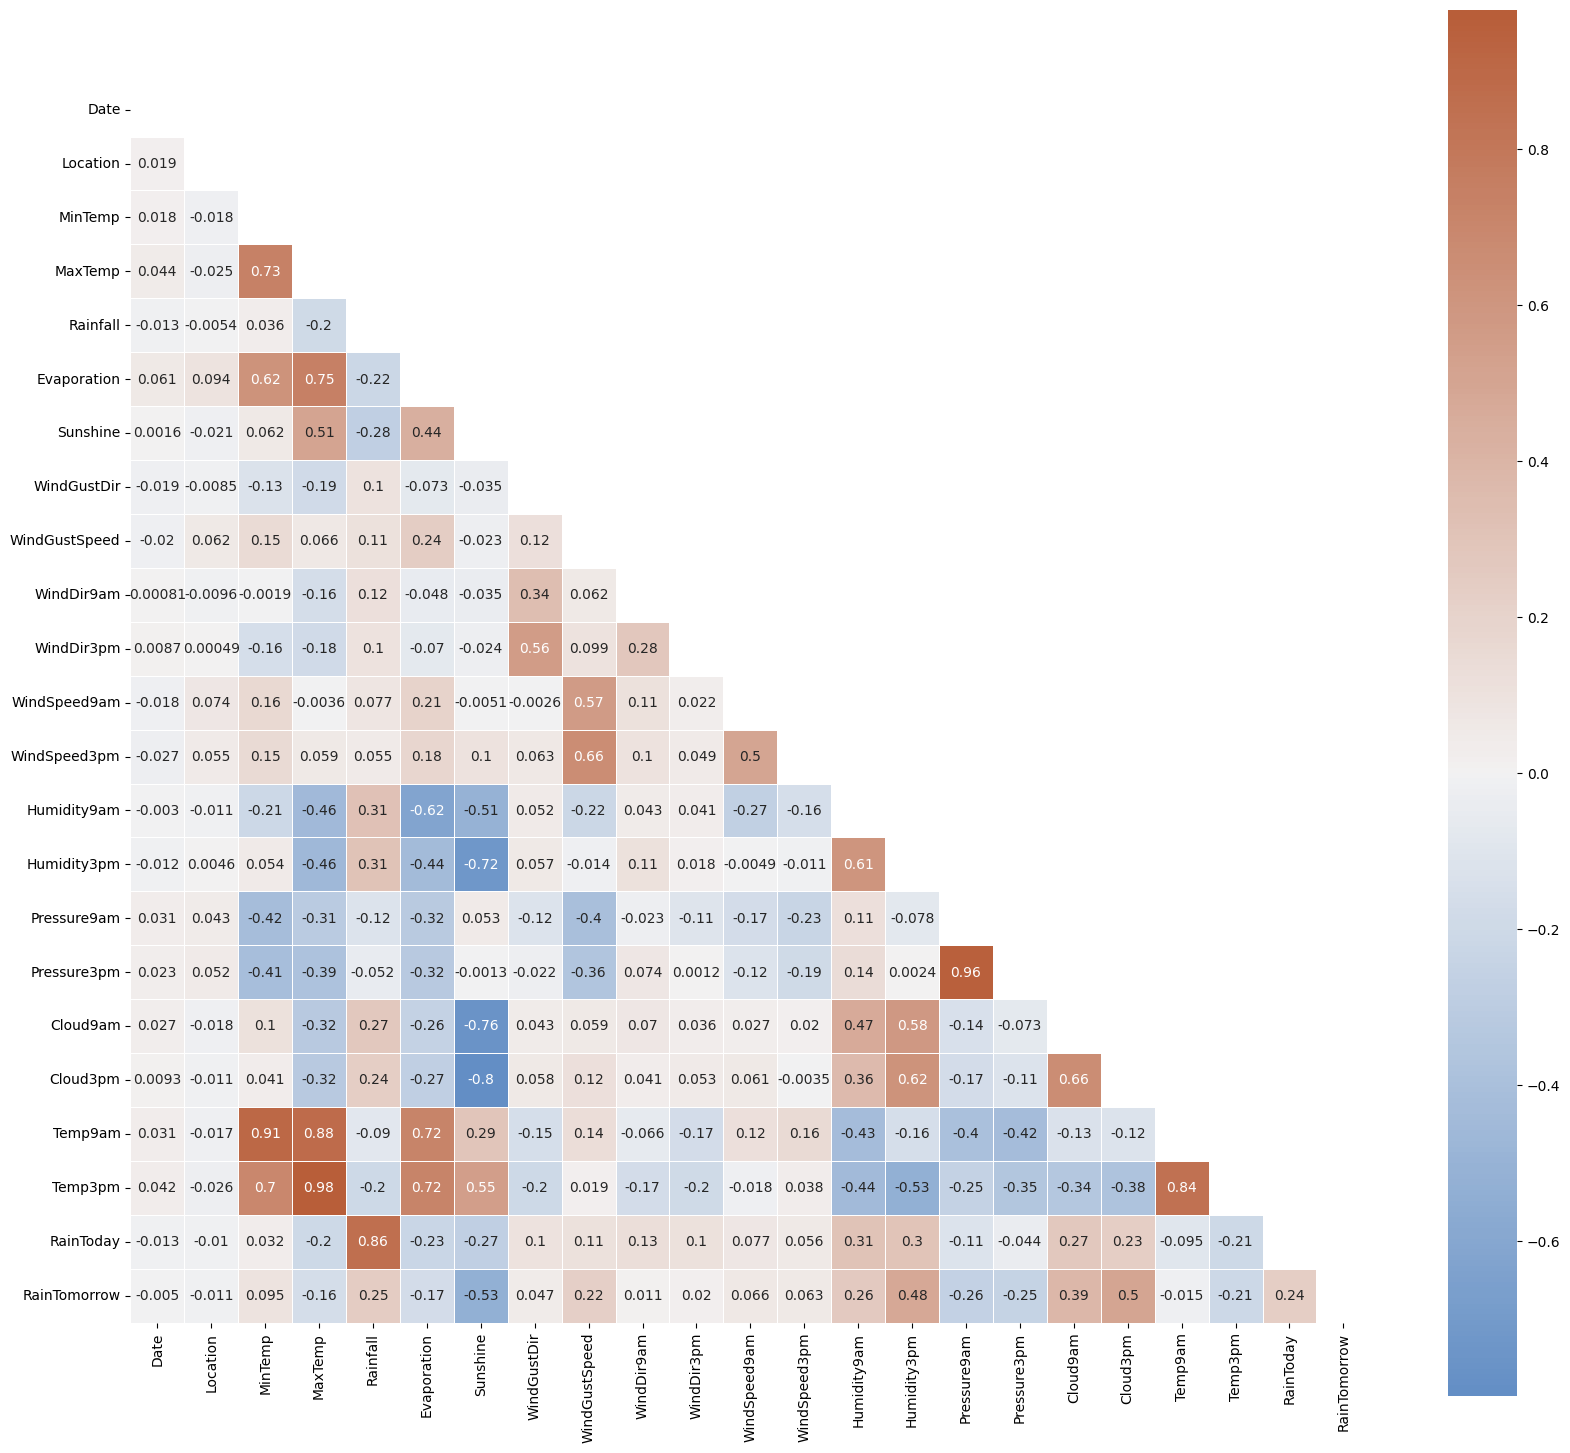

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = MiceImputed.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 25, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Show the plot
plt.show()


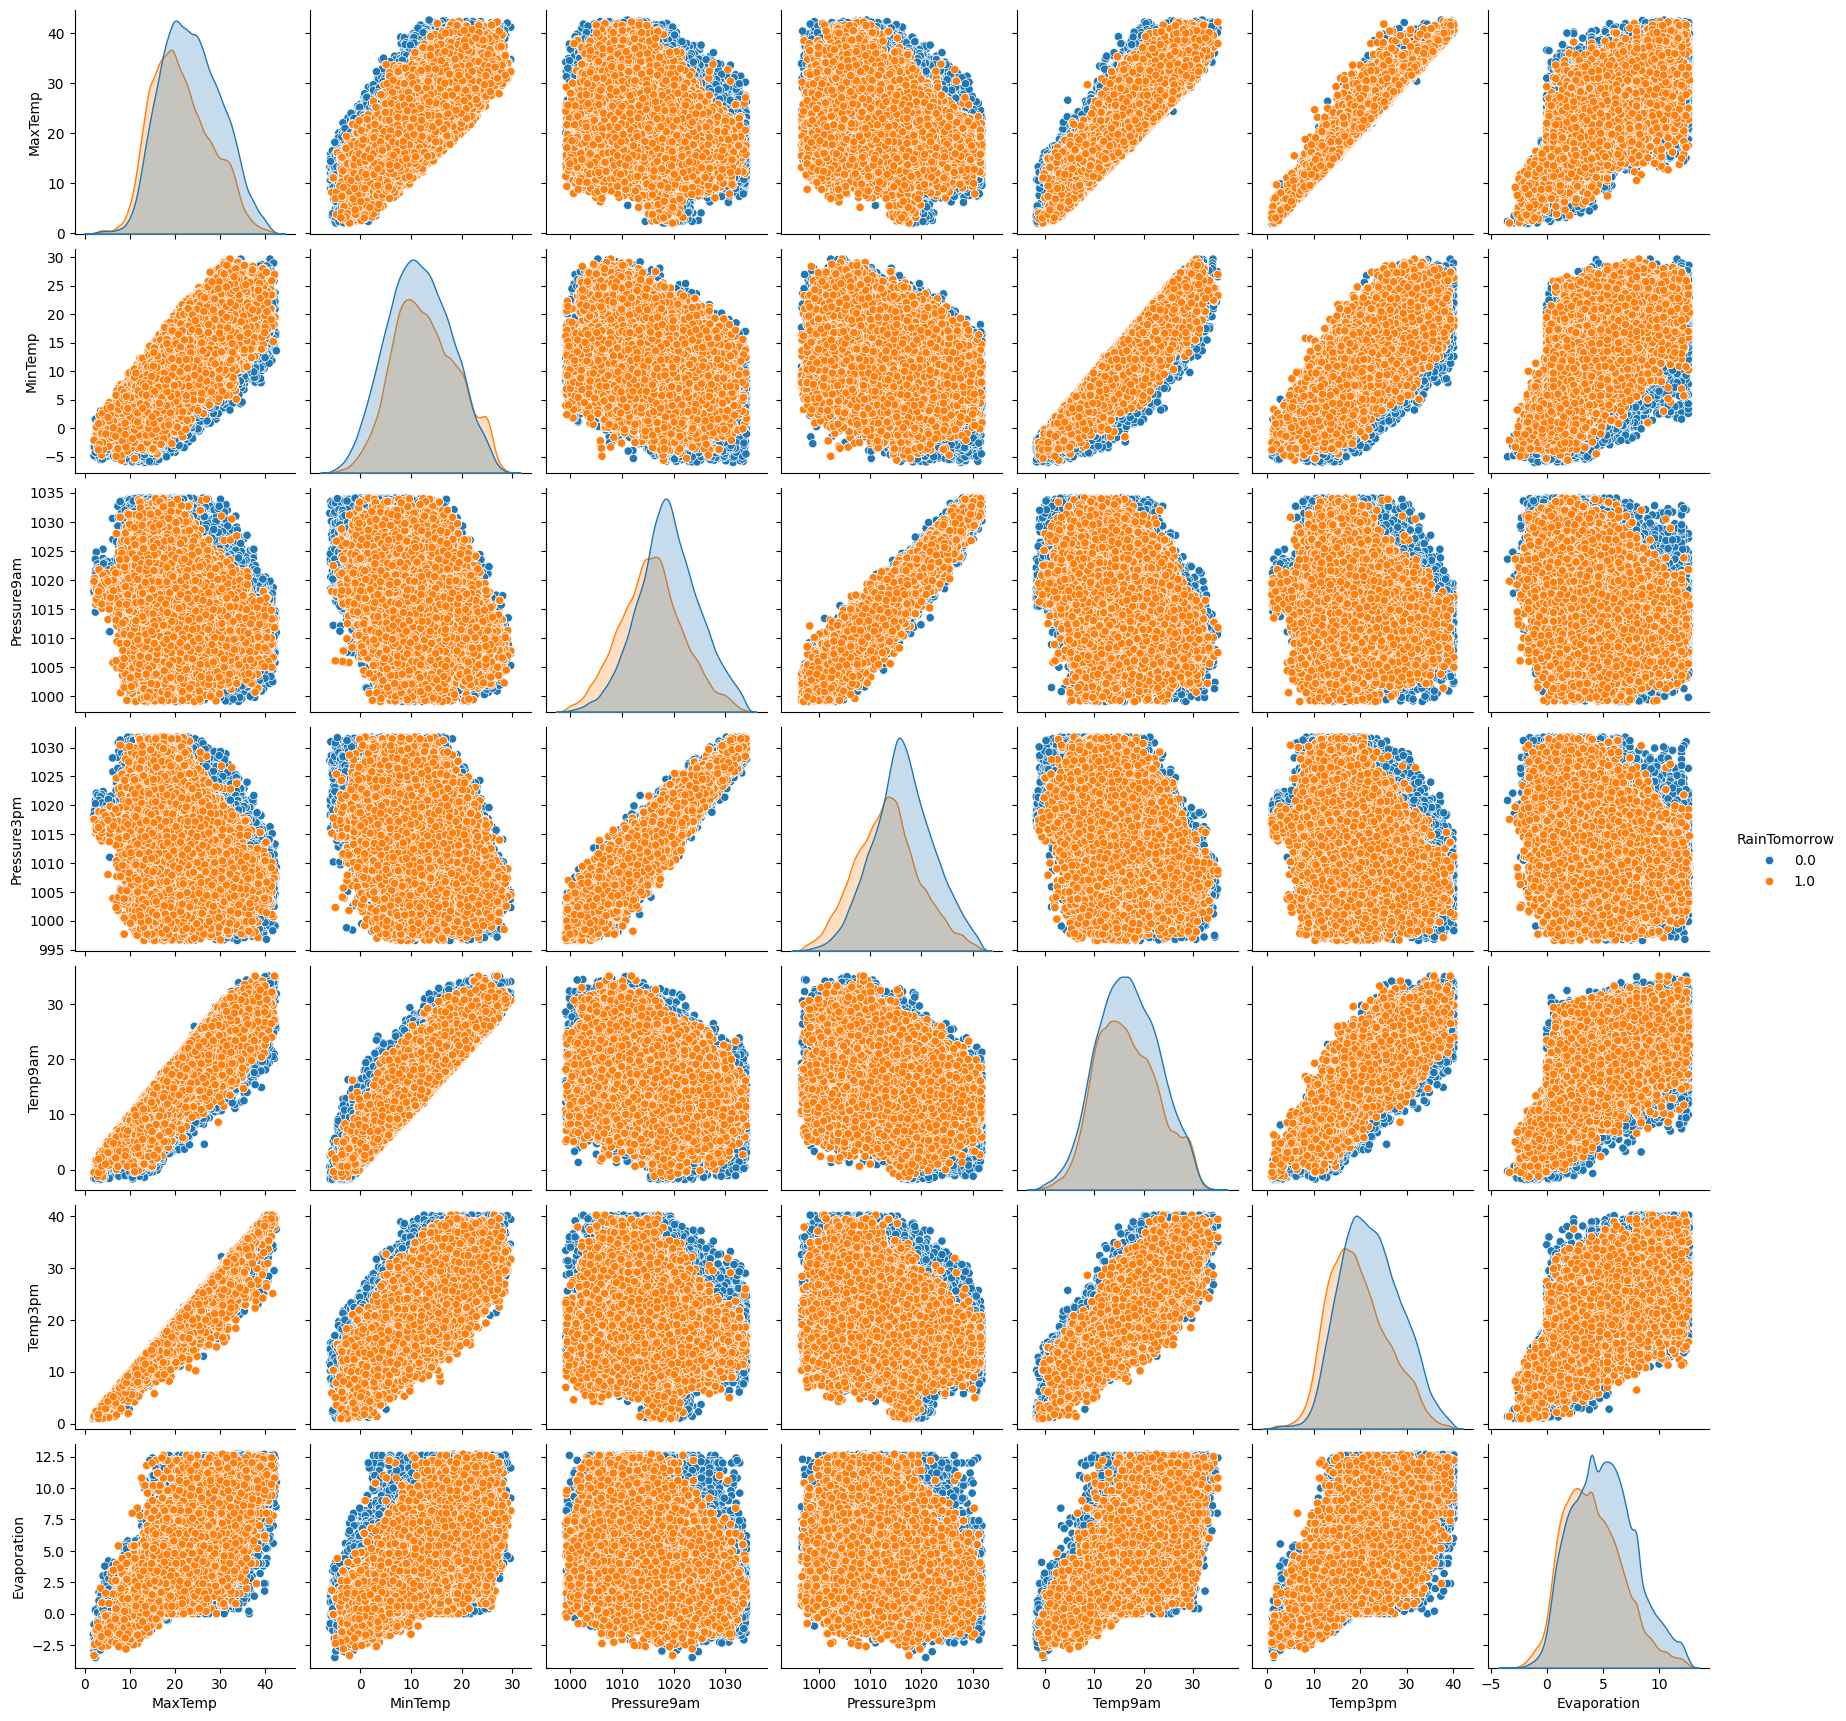

In [23]:
# Create pair plots for selected features
sns.pairplot(data=MiceImputed, vars=['MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'], hue='RainTomorrow')

# Show the pairplot
plt.show()


# Feature Selection

In [26]:
from sklearn import preprocessing
import pandas as pd

# Initialize the MinMaxScaler
r_scaler = preprocessing.MinMaxScaler()

# Fit the scaler on the data and transform it
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

# Display the first few rows of the scaled data
modified_data.head()


Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  0.115284  0.041667  0.543417  0.514778  0.437385     0.569756  0.512042   
1  0.115575  0.041667  0.375350  0.568966  0.374872     0.563868  0.745836   
2  0.115866  0.041667  0.529412  0.583744  0.374872     0.695026  0.793365   
3  0.116157  0.041667  0.425770  0.640394  0.374872     0.584743  0.762539   
4  0.116448  0.041667  0.658263  0.746305  0.479060     0.638825  0.413485   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0     0.866667       0.521127    0.866667  ...     0.551807     0.222773   
1     0.933333       0.521127    0.400000  ...     0.247750     0.252666   
2     1.000000       0.549296    0.866667  ...     0.180182     0.302488   
3     0.266667       0.239437    0.600000  ...     0.259012     0.162986   
4     0.866667       0.478873    0.066667  ...     0.675683     0.332382   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0     0.245714     0.298295  0.868449  0.420458  0.506775  0.530612   
1     0.328571     0.318182  0.339380  0.227713  0.514905  0.594388   
2     0.242857     0.343750  0.347461  0.173437  0.617886  0.566327   
3     0.528571     0.460227  0.297350  0.183513  0.539295  0.650510   
4     0.334286     0.267045  0.784042  0.693747  0.531165  0.732143   

   RainToday  RainTomorrow  
0    0.24783           0.0  
1    0.24783           0.0  
2    0.24783           0.0  
3    0.24783           0.0  
4    0.24783           0.0  

[5 rows x 23 columns]

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

# Split data into features (X) and target (y)
X = modified_data.loc[:, modified_data.columns != 'RainTomorrow']
y = modified_data[['RainTomorrow']]

# Apply SelectKBest with Chi-Square to select the top 10 features
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

# Print the top 10 selected feature names
print(X.columns[selector.get_support(indices=True)])


Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

# Separate features (X) and target (y) in the original (non-scaled) dataset
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']

# Initialize the RandomForest classifier
selector = SelectFromModel(rf(n_estimators=100, random_state=0))

# Fit the model
selector.fit(X, y)

# Get the selected features
support = selector.get_support()
features = X.loc[:, support].columns.tolist()

# Print the selected feature names
print(features)

# Print feature importances
print(rf(n_estimators=100, random_state=0).fit(X, y).feature_importances_)


['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03253427 0.02881107 0.03314079 0.03249158 0.02143225 0.03311921
 0.13843799 0.02077917 0.04263648 0.021398   0.02169729 0.02179529
 0.02339751 0.0344056  0.10634039 0.0483552  0.06129439 0.05797767
 0.13958632 0.03162141 0.03627126 0.01247686]


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=d666a9ec7b166e1fa26b9a4bdc282567edbd9c8945d41790faeafa1c27d2d3a2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [33]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.inspection import permutation_importance
import numpy as np

# Train the RandomForest model
rf_model = rf(n_estimators=100, random_state=0).fit(X, y)

# Perform permutation importance analysis
result = permutation_importance(rf_model, X, y, n_repeats=10, random_state=1, n_jobs=-1)

# Print feature importances
print("Feature importances (mean):", result.importances_mean)

# Get the indices of the most important features
important_indices = np.argsort(result.importances_mean)[::-1]

# Print the feature names sorted by importance
important_features = [X.columns[i] for i in important_indices]
print("Important features:", important_features)


Feature importances (mean): [0.00108924 0.00131014 0.00166638 0.00051679 0.0026566  0.00375932
 0.15673907 0.00039726 0.03626728 0.00134588 0.00067792 0.00043945
 0.00071425 0.00253649 0.13212769 0.01364571 0.07111309 0.0266551
 0.11583064 0.00089882 0.00103124 0.00138982]
Important features: ['Sunshine', 'Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'WindGustSpeed', 'Cloud9am', 'Pressure9am', 'Evaporation', 'Rainfall', 'Humidity9am', 'MinTemp', 'RainToday', 'WindDir9am', 'Location', 'Date', 'Temp3pm', 'Temp9am', 'WindSpeed3pm', 'WindDir3pm', 'MaxTemp', 'WindSpeed9am', 'WindGustDir']


# Training with Different Models

In [35]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
import matplotlib.pyplot as plt
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [41]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0

    print(f"Accuracy = {accuracy}")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"Time taken = {time_taken}")
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(X_test)[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Using ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')

    return model, accuracy, roc_auc, coh_kap, time_taken


In [42]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0

    print(f"Accuracy = {accuracy}")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"Time taken = {time_taken}")
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(X_test)[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Using ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')

    return model, accuracy, roc_auc, coh_kap, time_taken


 **Model-1: Logistic Regression**

Accuracy = 0.7956782600543733
ROC Area under Curve = 0.7901193001561344
Cohen's Kappa = 0.5832825311602825
Time taken = 4.212777853012085
              precision    recall  f1-score   support

         0.0    0.80568   0.83672   0.82090     23879
         1.0    0.78180   0.74352   0.76218     18789

    accuracy                        0.79568     42668
   macro avg    0.79374   0.79012   0.79154     42668
weighted avg    0.79516   0.79568   0.79505     42668



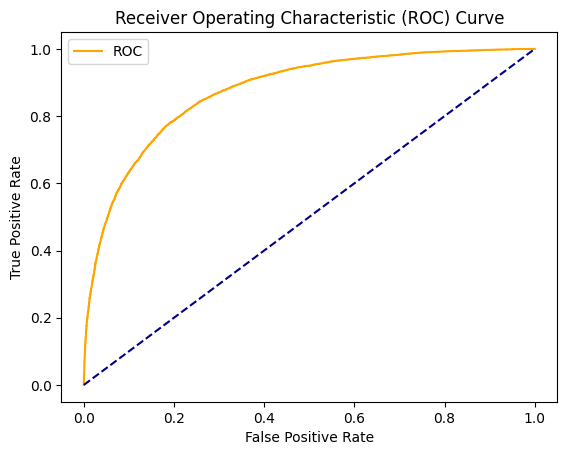

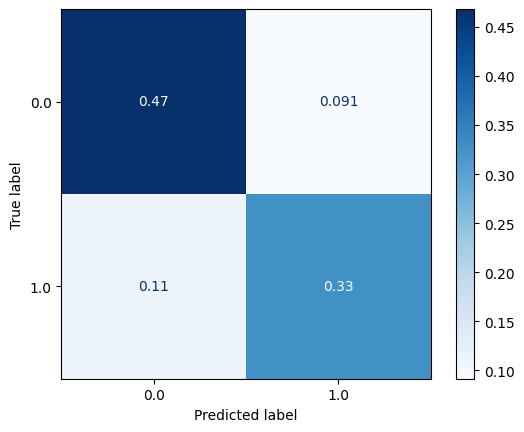

In [43]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver': 'liblinear'}
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


**Model-2: Decision Tree**

Accuracy = 0.8680744351739008
ROC Area under Curve = 0.8684020139404063
Cohen's Kappa = 0.7335294128585133
Time taken = 0.8835873603820801
              precision    recall  f1-score   support

         0.0    0.89516   0.86566   0.88016     23879
         1.0    0.83613   0.87115   0.85328     18789

    accuracy                        0.86807     42668
   macro avg    0.86564   0.86840   0.86672     42668
weighted avg    0.86916   0.86807   0.86832     42668



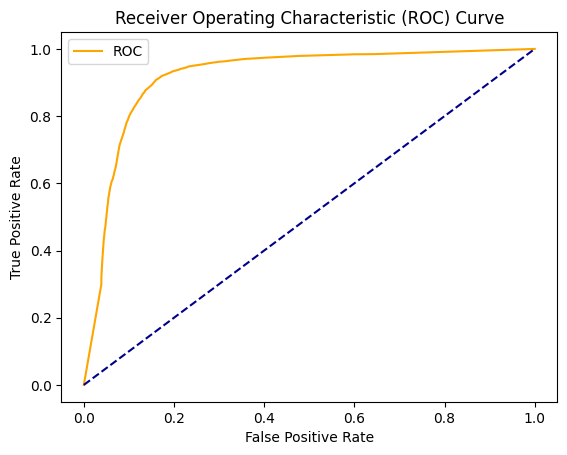

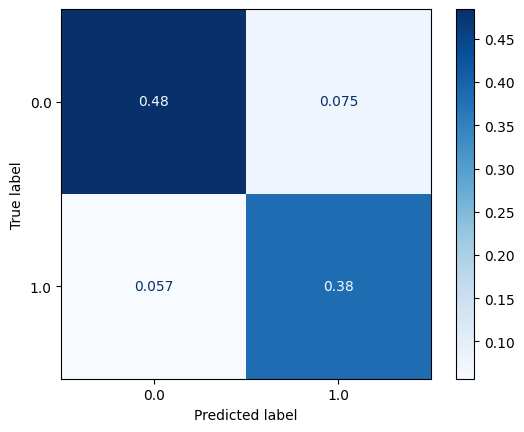

In [44]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16, 'max_features': "sqrt"}
model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)


**Model-3: Neural Network**

Accuracy = 0.8884409862191807
ROC Area under Curve = 0.8872389011686825
Cohen's Kappa = 0.7738457037022046
Time taken = 376.57375502586365
              precision    recall  f1-score   support

         0.0    0.90276   0.89732   0.90003     23879
         1.0    0.87049   0.87716   0.87381     18789

    accuracy                        0.88844     42668
   macro avg    0.88663   0.88724   0.88692     42668
weighted avg    0.88855   0.88844   0.88849     42668



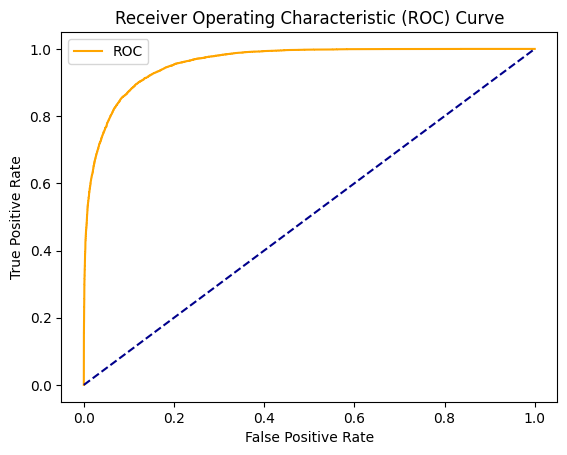

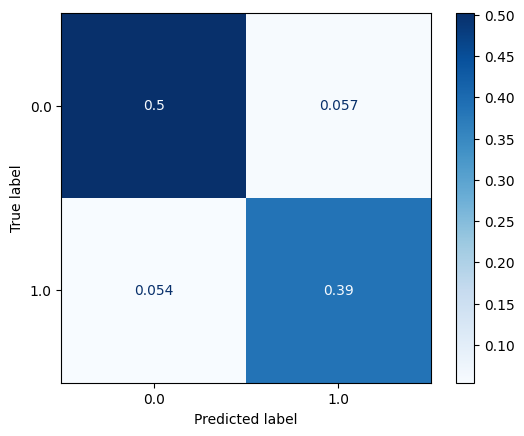

In [45]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30), 'activation': 'logistic', 'solver': 'lbfgs', 'max_iter': 500}
model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

**Model-4: Random Forest**

Accuracy = 0.934072372738352
ROC Area under Curve = 0.9359369759807289
Cohen's Kappa = 0.8669904479826398
Time taken = 40.12701654434204
              precision    recall  f1-score   support

         0.0    0.96024   0.92031   0.93985     23879
         1.0    0.90380   0.95157   0.92707     18789

    accuracy                        0.93407     42668
   macro avg    0.93202   0.93594   0.93346     42668
weighted avg    0.93539   0.93407   0.93422     42668



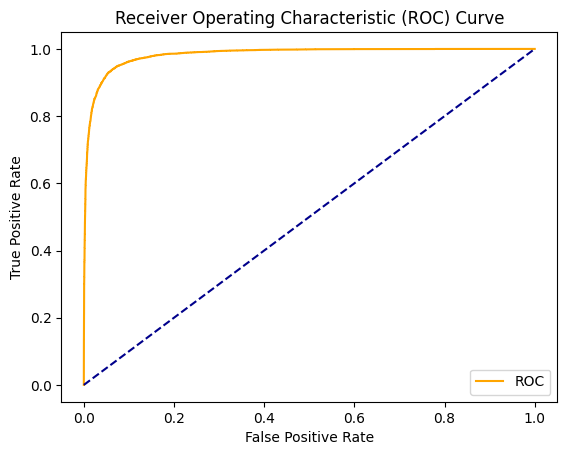

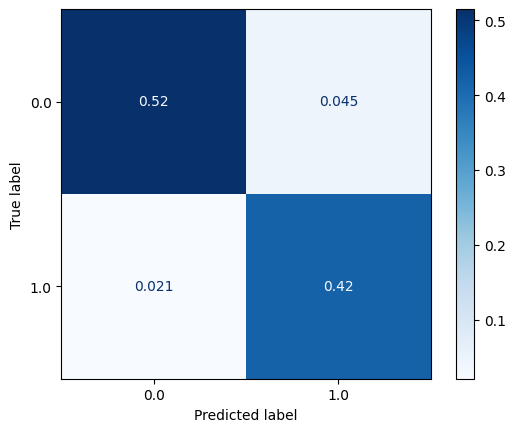

In [46]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 12345}
model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


# Plotting Decision Region for all Models

In [47]:
!pip install lightgbm catboost xgboost mlxtend seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


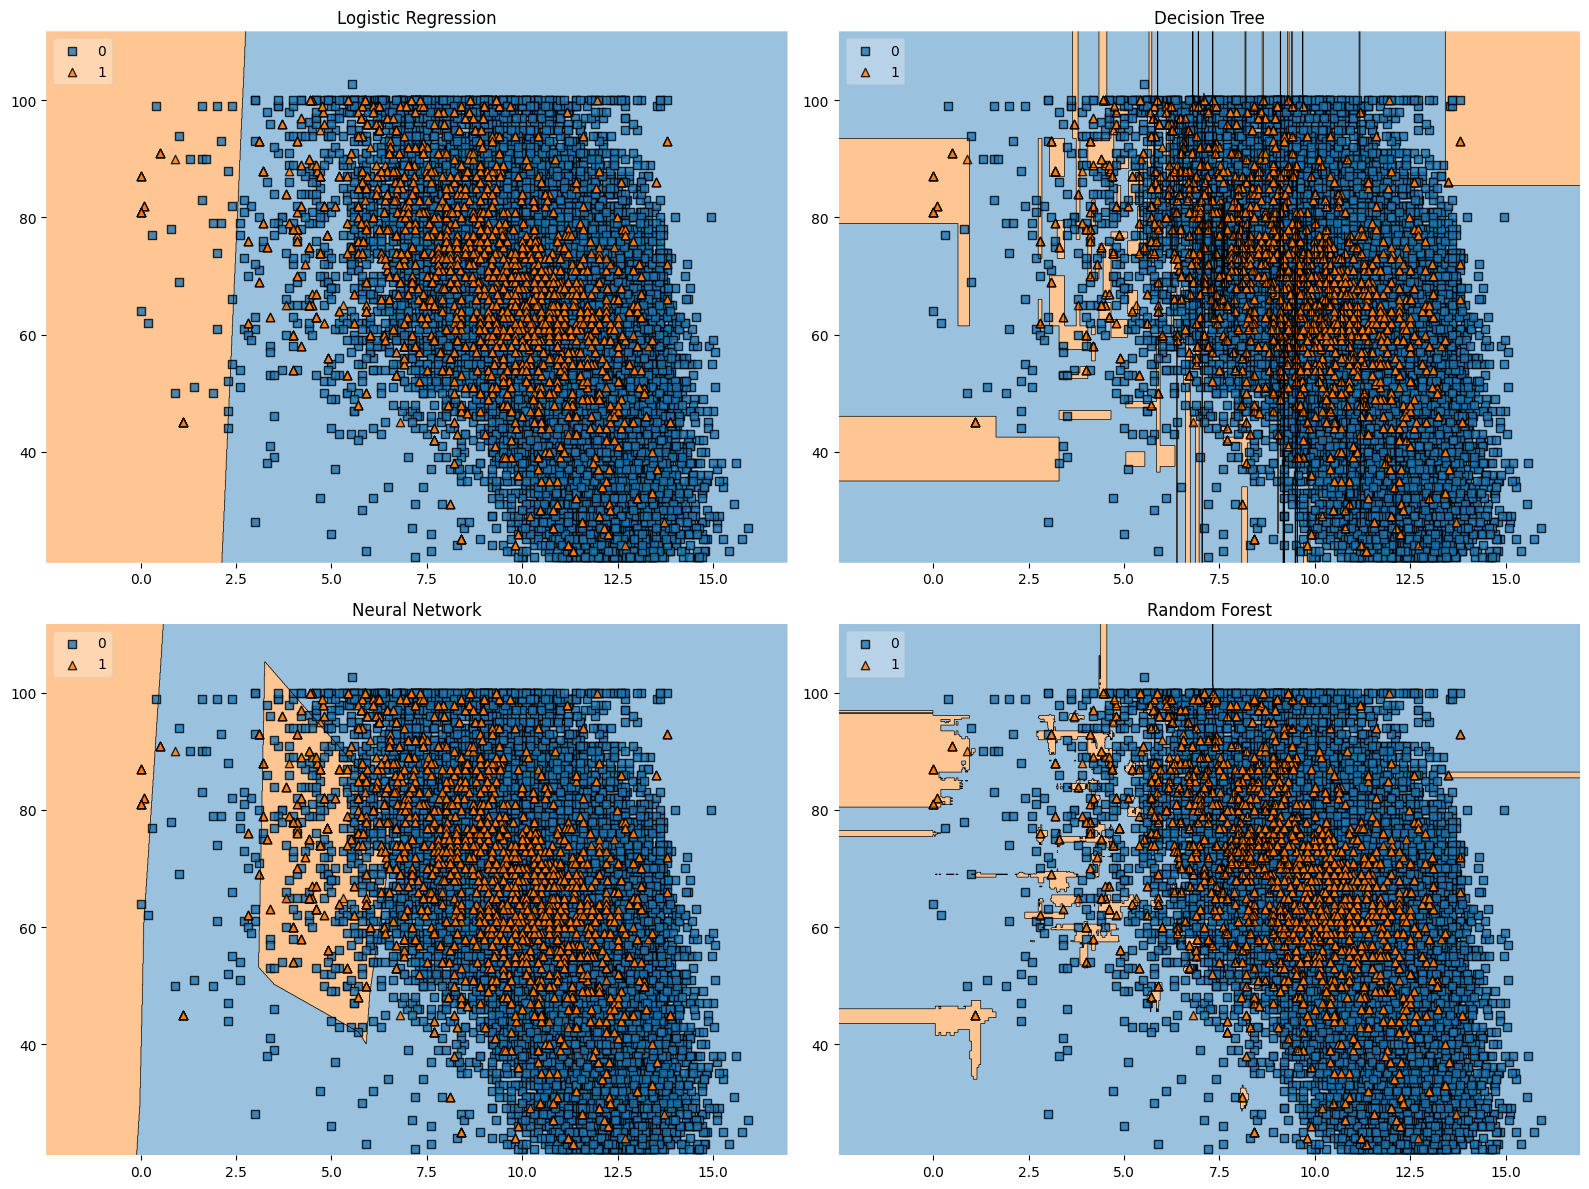

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

# Set parameters for decision boundary plotting
value = 1.80
width = 0.90

# Define classifiers
clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = MLPClassifier(random_state=12345, verbose=0)
clf4 = RandomForestClassifier(random_state=12345)

# Prepare features and target variable (assuming MiceImputed DataFrame is defined)
X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]]  # Selecting important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)  # Adjusted for 4 classifiers
fig = plt.figure(figsize=(16, 12))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest']

# Fit classifiers and plot decision regions
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):  # Adjusted for 4 classifiers
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: value},
                                filler_feature_ranges={2: width},
                                legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()


In [50]:
!pip install seaborn


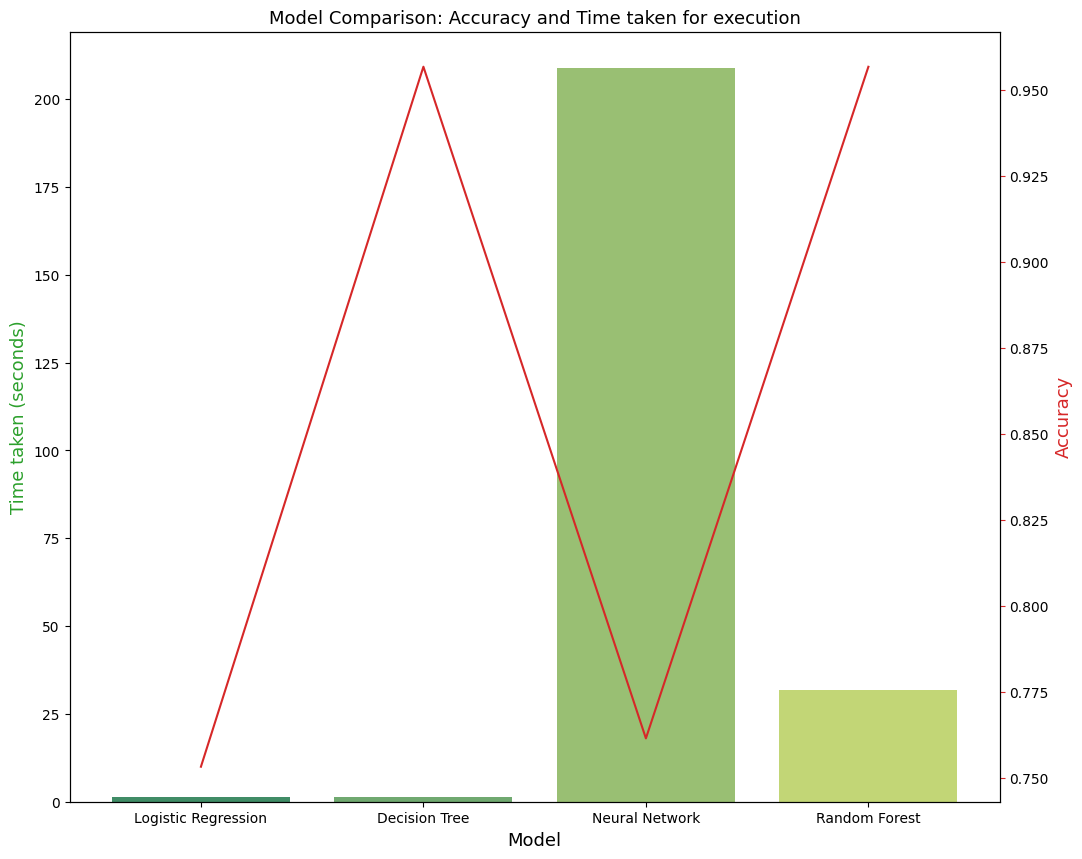

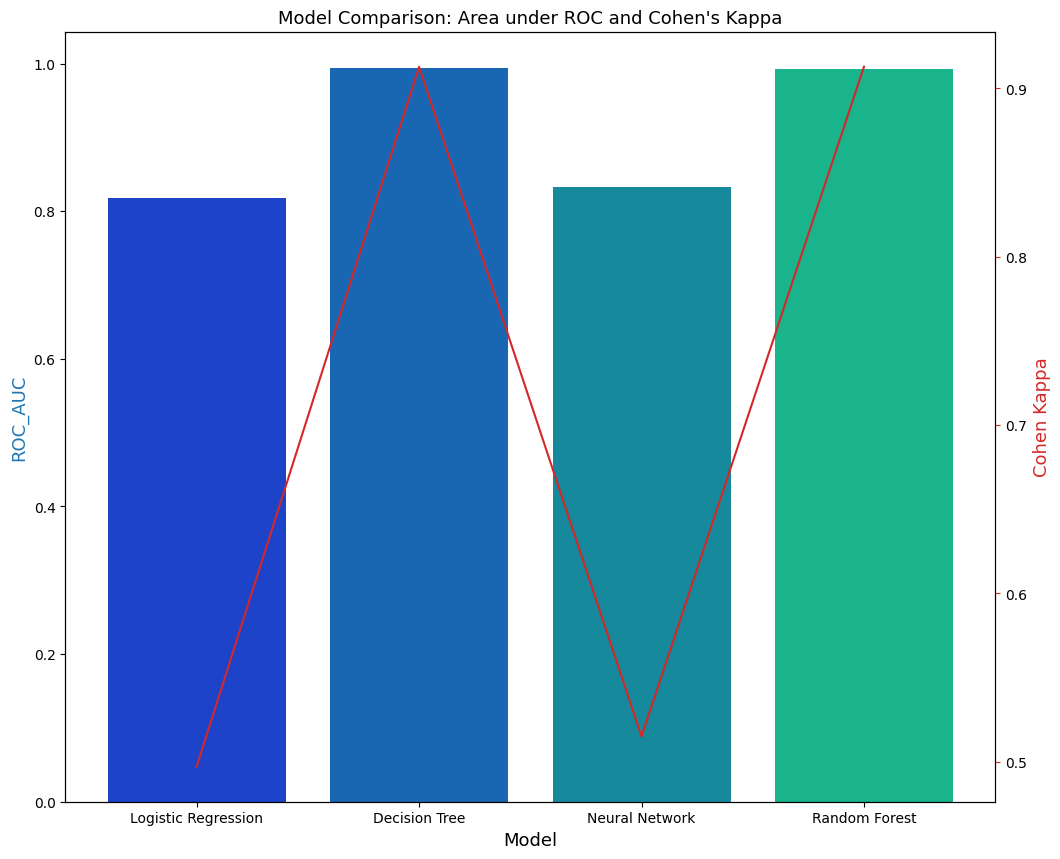

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import time

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=12345),
    'Decision Tree': DecisionTreeClassifier(random_state=12345),
    'Neural Network': MLPClassifier(random_state=12345, verbose=0),
    'Random Forest': RandomForestClassifier(random_state=12345)
}

# Initialize lists to hold metrics
accuracy_scores = []
roc_auc_scores = []
coh_kap_scores = []
execution_times = []

# Prepare features and target variable (assuming MiceImputed DataFrame is defined)
X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]]
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Train each model and compute metrics
for name, clf in classifiers.items():
    start_time = time.time()

    # Fit the model
    clf.fit(X, y)

    # Predict on the training set (or use a validation set for real evaluation)
    y_pred = clf.predict(X)

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    roc_auc = roc_auc_score(y, clf.predict_proba(X)[:, 1])  # Use predict_proba for ROC AUC
    coh_kap = cohen_kappa_score(y, y_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    coh_kap_scores.append(coh_kap)
    execution_times.append(time.time() - start_time)

# Prepare data for plotting
model_data = {
    'Model': list(classifiers.keys()),
    'Accuracy': accuracy_scores,
    'ROC_AUC': roc_auc_scores,
    'Cohen_Kappa': coh_kap_scores,
    'Time taken': execution_times
}
data = pd.DataFrame(model_data)

# Plot Accuracy and Time taken
fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken (seconds)', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data=data, palette='summer', ax=ax1)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data=data, sort=False, color=color, ax=ax2)
ax2.tick_params(axis='y', color=color)

# Plot ROC AUC and Cohen's Kappa
fig, ax3 = plt.subplots(figsize=(12, 10))
ax3.set_title('Model Comparison: Area under ROC and Cohen\'s Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data=data, palette='winter', ax=ax3)
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data=data, sort=False, color=color, ax=ax4)
ax4.tick_params(axis='y', color=color)

plt.show()


# *** END ***

# *** ML PROJECT-Aneesh Thakre ***